In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('world_bank_amounts.pickle')
df.head()

,year,month,day,id,name,ARTICLE II,Amount_G,Amount_G_num
0,1991,september,12,558671468103155868,conformed-copy--l3361--kolubara-b-thermal-powe...,ARTICLE II\n\n The...,"[three hundred million dollars, $300,000,000]","$300,000,000"
1,2001,may,31,473681468094784501,conformed-copy--l7054--railway-restructuring-p...,ARTICLE II\n\nThe Loan\n\nSection 2.01. The Ba...,"[one hundred \nand ten million Euro, EUR 110,0...","EUR 110,000,000"
2,1991,november,19,892131468028134392,china--beijing-environmental-project-:-loan-34...,ARTICLE II \n\nThe Loan \n\nSection 2.01. The ...,"[forty-five million dollars, $45,000,000]","$45,000,000"
3,2013,may,20,945021468224685176,"official-documents-loan-agreement,-l8236-cn-cl...",ARTICLE II - PROJECT\n\n3.01. The Borrower dec...,None,None
4,1991,may,7,107521468303622178,conformed-copy--l3230--third-highway-sector-pr...,ARTICLE II\n\nThe Loan\n\nSection 2.01. The Ba...,"[fifty-five million dollars, $55,000,000]","$55,000,000"


In [3]:
def get_amount(x):

    curr = ''
    num = '0'
    if x:
        for i, s in enumerate(x):
            if not s.isdigit():
                curr += s
            else:
                num = x[i:]
                break
    return pd.Series([curr.strip(), num], index=['currency', 'Amount'])
        

In [4]:
get_amount('$300,000,000')

currency              $
Amount      300,000,000
dtype: object

In [5]:
df[['currency', 'Amount']] = df['Amount_G_num'].apply(get_amount)

In [6]:
df.head()

,year,month,day,id,name,ARTICLE II,Amount_G,Amount_G_num,currency,Amount
0,1991,september,12,558671468103155868,conformed-copy--l3361--kolubara-b-thermal-powe...,ARTICLE II\n\n The...,"[three hundred million dollars, $300,000,000]","$300,000,000",$,"300,000,000"
1,2001,may,31,473681468094784501,conformed-copy--l7054--railway-restructuring-p...,ARTICLE II\n\nThe Loan\n\nSection 2.01. The Ba...,"[one hundred \nand ten million Euro, EUR 110,0...","EUR 110,000,000",EUR,"110,000,000"
2,1991,november,19,892131468028134392,china--beijing-environmental-project-:-loan-34...,ARTICLE II \n\nThe Loan \n\nSection 2.01. The ...,"[forty-five million dollars, $45,000,000]","$45,000,000",$,"45,000,000"
3,2013,may,20,945021468224685176,"official-documents-loan-agreement,-l8236-cn-cl...",ARTICLE II - PROJECT\n\n3.01. The Borrower dec...,None,None,,0
4,1991,may,7,107521468303622178,conformed-copy--l3230--third-highway-sector-pr...,ARTICLE II\n\nThe Loan\n\nSection 2.01. The Ba...,"[fifty-five million dollars, $55,000,000]","$55,000,000",$,"55,000,000"


In [7]:
df.currency.unique()

array(['$', 'EUR', '', 'twenty nine million  Euros', 'US$', '€', 'USD',
       'one hundred million \nDollars',
       'thirty six million eight hundred \nthousand Euro',
       '$200,000,000$150,000,000', 'DEM', 'fifty-eight million Euro',
       'thirteen million three hundred \nthousand Euro',
       'two hundred million Dollars',
       'four hundred and sixty million Euros',
       'five million \neight hundred thousand Euro',
       'one hundred million Euros', 'JPY',
       'forty nine \nmillion four hundred thousand Euro',
       'Four hundred fifty \nmillion Dollars',
       'three hundred twenty \nsix million seven hundred and seventy five thousand Dollars',
       'twelve million five hundred \nthousand Euro',
       'twenty six \nmillion Euro', 'five hundred million \n\nDollars',
       'fourteen million eight hundred \n\nthousand Euro',
       'seventy million Euro', 'USD31,720,000EUR92,000,000',
       'fifty million euro', 'seven hundred million Dollars',
       'sevente

In [8]:
df.Amount.unique()

array(['300,000,000', '110,000,000', '45,000,000', '0', '55,000,000',
       '250,000,000', '57,000,000', '50,000,000', '60,000,000',
       '63,800,000', '4,400,000', '175,000,000', '531,190,000',
       '36,300,000', '31,300,000', '186,000,000', '25,000,000',
       '7,940,000', '1,100,000,000', '20,800,000', '174,000,000',
       '43,800,000', '182,800,000', '24,290,000', '69,000,000',
       '33,500,000', '130,000,000', '59,124,000', '10,000,000',
       '150,000,000', '100,000,000', '9,000,000', '29,000,000',
       '350,000,000', '640,000,000', '153', '63,200,000', '400,000,000',
       '650,400,000', '330,000,000', '23,000,000', '10,580,000',
       '61,500,000', '26,000,000', '83,200,000', '82,700,000',
       '12,000,000', '501,250,000', '8,500,000', '170,000,000',
       '64,000,000', '505,060,000', '51,300,000', '220,000,000',
       '15,800,000', '38,000,000', '29,100,000', '12,700,000',
       '65,000,000', '20,000,000', '33,000,000', '80,000,000',
       '13,000,000', '8,

In [9]:
df[df.Amount.str.contains('€')]

,year,month,day,id,name,ARTICLE II,Amount_G,Amount_G_num,currency,Amount
2591,2018,april,21,981381524666698526,official-documents-loan-agreement-for-loan-884...,ARTICLE II - LOAN \n\n2.01. The Bank agrees to...,[one hundred \nsixty-three million seven hundr...,"163,700,000 €",,"163,700,000 €"


In [10]:
df.loc[2591, 'currency'] = '€'
df.loc[2591, 'Amount'] = '163,700,000'

In [11]:
df[df.Amount.str.contains('€')]

,year,month,day,id,name,ARTICLE II,Amount_G,Amount_G_num,currency,Amount


In [12]:
df[df.Amount.str.contains('153')]

,year,month,day,id,name,ARTICLE II,Amount_G,Amount_G_num,currency,Amount
47,1992,may,12,329401468050034439,india--second-national-highway-project-:-loan-...,ARTICLE II \n\nThe Loan \n\nSection 2.01. The ...,"[one hundred fifty-three million dollars, $153]",$153,$,153
1618,1992,june,18,598281468051850413,conformed-copy--c2365--second-national-highway...,ARTICLE II\n\n The...,"[one hundred fifty-three million dollars, $153...","$153,000,000",$,"153,000,000"
3098,1992,may,12,168201468051268836,india--second-national-highway-project-:-credi...,ARTICLE II \n\nThe Loan \n\nSection 2.01. The ...,"[one hundred fifty-three million dollars, $153]",$153,$,153


In [13]:
print(df.loc[3098, 'ARTICLE II'][:400])

ARTICLE II 

The Loan 

Section 2.01. The Bank agrees to lend to the Borrower, on the 
terms and conditions set forth or referred to in the Loan Agreement, 
various currencies that shall have an aggregate value equivalent to 
the amount of one hundred fifty-three million dollars 
($153 ,000,000), being the sum of withdrawals of the proceeds of the 

Loan, with each withdrawal valued by the Bank as


In [14]:
df.loc[47, 'Amount'] = '153,000,000'
df.loc[3098, 'Amount'] = '153,000,000'

In [15]:
df[df.Amount == '8']

,year,month,day,id,name,ARTICLE II,Amount_G,Amount_G_num,currency,Amount
2673,2014,december,19,523951468276377690,"official-documents-loan-agreement,-loan-8440-m...",ARTICLE II - LOAN\n\n2.01. The Bank agrees to ...,"[eighty\nmillion Dollars, $8]",$8,$,8


In [16]:
print(df.loc[2673, 'ARTICLE II'][:400])

ARTICLE II - LOAN

2.01. The Bank agrees to lend to the Borrower, on the terms and conditions set forth or
referred to in this A greement: (a) the amount of two hundred thirty-four million
five hundred thous and Euros (E234,500,000); and (b) the amount of eighty
million Dollars ($8 ),000,000), as such amounts may be converted from time to
time through a Curr -ncy Conversion in accordance with the 


In [17]:
# this loan contains two parts. Here I just take the maximum. Can come back latter
df.loc[2591, 'currency'] = 'Euros'
df.loc[2591, 'Amount'] = '234,500,000'

## Words to int

In [18]:
from text2int import text2int

In [19]:
def get_first_amount(x):
    amt = ''
    curr = ''
    if x:
        res = text2int(x[0].lower()).strip()
        if res[0].isdigit():
            for i,s in enumerate(res):
                if s.isdigit():
                    amt += s
                else:
                    curr = res[i:].strip()
                    break
        else:
            for i,s in enumerate(res):
                if not s.isdigit():
                    curr += s
                else:
                    amt = res[i:].strip()
                    break
    return pd.Series([curr, amt], index=['currency1', 'Amount1'])
df[['currency1', 'Amount1']] = df['Amount_G'].apply(get_first_amount)

In [20]:
df['currency1'].unique()

array(['dollars', 'euro', '', 'euros', 'united states dollars', '$',
       'dem ', 'us dollars', 'eur ', 'japanese yen', 'us$',
       'french francs', 'yen', '$ ', 'dollars ', 'gbp ', 'dem',
       'u.s. dollars', 'dollar', 'usd ', 'egyptian pounds'], dtype=object)

In [21]:
def standard_curr(x):
    if 'dollar' in x or 'usd' in x or '$' in x:
        return 'us dollar'
    if 'japan' in x:
        return 'yen'
    if 'eur' in x:
        return 'euro'
    return x.strip()
df['currency_standard'] = df['currency1'].apply(standard_curr)
df['currency_standard'].unique()

array(['us dollar', 'euro', '', 'dem', 'yen', 'french francs', 'gbp',
       'egyptian pounds'], dtype=object)

In [22]:
df['Amount1'].unique()

array(['300000000', '110000000', '45000000', '', '55000000', '250000000',
       '29000000', '57000000', '50000000', '60000000', '800000',
       '4400000', '175000000', '531190000', '36300000', '31300000',
       '186000000', '25000000', '7940000', '1100000000', '20800000',
       '174000000', '43800000', '182800000', '24290000', '69000000',
       '33500000', '130000000', '59124000', '10000000', '100,000,000',
       '36800000', '150000000', '100000000', '9000000', '350000000',
       '200000000', '640000000', '153000000', '63200000', '400000000',
       '650400000', '330000000', '23000000', '10580000', '61500000',
       '26000000', '83200000', '82700000', '12000000', '501250000',
       '8500000', '70000000', '64000000', '505060000', '51300000',
       '220000000', '15800000', '38000000', '29100000', '58000000',
       '12700000', '65000000', '20000000', '33000000', '80000000',
       '13000000', '8880000', '310000000', '21500000', '93000000',
       '106000000', '18100000', '40000

In [23]:
def standard_amt(x):
    if not x:
        return None
    else:
        return int(x.replace(',',''))
df['amount_standard'] = df['Amount1'].apply(standard_amt)

In [24]:
df.head()

,year,month,day,id,name,ARTICLE II,Amount_G,Amount_G_num,currency,Amount,currency1,Amount1,currency_standard,amount_standard
0,1991,september,12,558671468103155868,conformed-copy--l3361--kolubara-b-thermal-powe...,ARTICLE II\n\n The...,"[three hundred million dollars, $300,000,000]","$300,000,000",$,"300,000,000",dollars,300000000,us dollar,300000000.0
1,2001,may,31,473681468094784501,conformed-copy--l7054--railway-restructuring-p...,ARTICLE II\n\nThe Loan\n\nSection 2.01. The Ba...,"[one hundred \nand ten million Euro, EUR 110,0...","EUR 110,000,000",EUR,"110,000,000",euro,110000000,euro,110000000.0
2,1991,november,19,892131468028134392,china--beijing-environmental-project-:-loan-34...,ARTICLE II \n\nThe Loan \n\nSection 2.01. The ...,"[forty-five million dollars, $45,000,000]","$45,000,000",$,"45,000,000",dollars,45000000,us dollar,45000000.0
3,2013,may,20,945021468224685176,"official-documents-loan-agreement,-l8236-cn-cl...",ARTICLE II - PROJECT\n\n3.01. The Borrower dec...,None,None,,0,,,,NaN
4,1991,may,7,107521468303622178,conformed-copy--l3230--third-highway-sector-pr...,ARTICLE II\n\nThe Loan\n\nSection 2.01. The Ba...,"[fifty-five million dollars, $55,000,000]","$55,000,000",$,"55,000,000",dollars,55000000,us dollar,55000000.0


In [25]:
df['amount_standard'].isna().sum()

457

Notes:
- 457 files didn't work out. We need to check out why and see if there is any pattern in this files.
- If there are multiple amounts in the agreements, we only take the first one. We can check the column Amount_G for a whole list of the amounts. 
- There are seven currencies and we haven't standardize the amount of loans using us dollars. 
  - 'us dollar', 'euro', 'dem', 'yen', 'french francs', 'gbp',
       'egyptian pounds'

# Plots

In [27]:
# get countries
df_ct = pd.read_csv('id_date_country.csv')
df_ct['id'] = df_ct['id'].apply(str)
df_ct.head()

,id,date,country_code,country_name,filename
0,658601468273303198,1990-01-05,jo,Jordan,1990_january_5_658601468273303198_conformed-co...
1,784351468234894668,1990-01-10,br,Brazil,1990_january_10_784351468234894668_conformed-c...
2,891941468049466312,1990-01-11,ma,Morocco,1990_january_11_891941468049466312_conformed-c...
3,125511468051878371,1990-01-11,ma,Morocco,1990_january_11_125511468051878371_conformed-c...
4,733341468033245855,1990-01-16,ivc,Cote d'Ivoire,1990_january_16_733341468033245855_conformed-c...


In [42]:
df = df.join(df_ct[['id', 'country_code', 'country_name']].set_index('id'), on = 'id')

In [43]:
df.head()

,year,month,day,id,name,ARTICLE II,Amount_G,Amount_G_num,currency,Amount,currency1,Amount1,currency_standard,amount_standard,country_code,country_name
0,1991,september,12,558671468103155868,conformed-copy--l3361--kolubara-b-thermal-powe...,ARTICLE II\n\n The...,"[three hundred million dollars, $300,000,000]","$300,000,000",$,"300,000,000",dollars,300000000,us dollar,300000000.0,yu,Yugoslavia
1,2001,may,31,473681468094784501,conformed-copy--l7054--railway-restructuring-p...,ARTICLE II\n\nThe Loan\n\nSection 2.01. The Ba...,"[one hundred \nand ten million Euro, EUR 110,0...","EUR 110,000,000",EUR,"110,000,000",euro,110000000,euro,110000000.0,pol,Poland
2,1991,november,19,892131468028134392,china--beijing-environmental-project-:-loan-34...,ARTICLE II \n\nThe Loan \n\nSection 2.01. The ...,"[forty-five million dollars, $45,000,000]","$45,000,000",$,"45,000,000",dollars,45000000,us dollar,45000000.0,cha,China
3,2013,may,20,945021468224685176,"official-documents-loan-agreement,-l8236-cn-cl...",ARTICLE II - PROJECT\n\n3.01. The Borrower dec...,None,None,,0,,,,NaN,cn,China
4,1991,may,7,107521468303622178,conformed-copy--l3230--third-highway-sector-pr...,ARTICLE II\n\nThe Loan\n\nSection 2.01. The Ba...,"[fifty-five million dollars, $55,000,000]","$55,000,000",$,"55,000,000",dollars,55000000,us dollar,55000000.0,yu,Yugoslavia


In [44]:
df[['year', 'country_name', 'amount_standard']].groupby('year')

Text(0, 0.5, 'Total Amount of Loans')

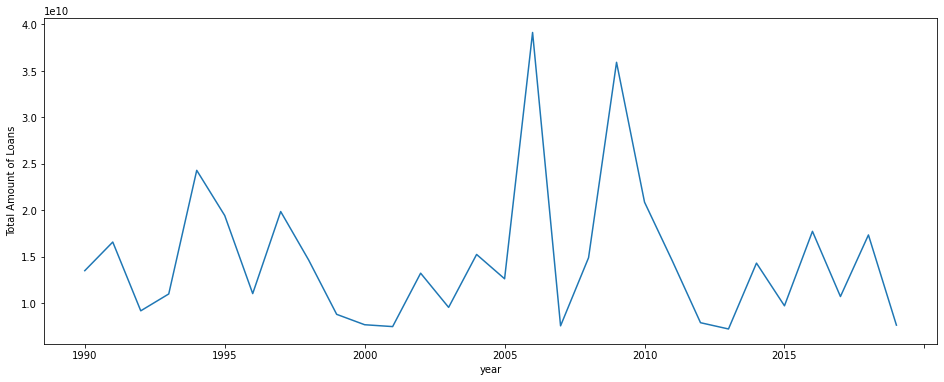

In [53]:
plt.figure(figsize = (16,6))
df.groupby('year')['amount_standard'].sum().plot()
plt.ylabel('Total Amount of Loans')

In [66]:
df.groupby('country_name')['id'].count().reset_index(name = 'count').sort_values(by='count', ascending = False)[:10]

,country_name,count
45,India,334
20,China,318
14,Brazil,157
65,Morocco,135
96,Turkey,109
74,Philippines,104
4,Argentina,92
95,Tunisia,80
77,Russian Federation,79
76,Romania,77


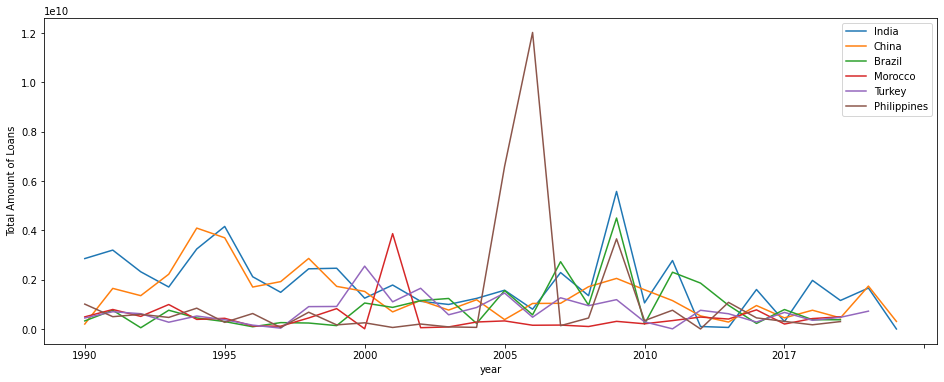

In [67]:
top_countries = ['India','China','Brazil','Morocco', 'Turkey', 'Philippines']
plt.figure(figsize = (16,6))
for cty in top_countries:
    df[df.country_name == cty].groupby('year')['amount_standard'].sum().plot(label = cty)
plt.ylabel('Total Amount of Loans')
plt.legend()

In [68]:
df.head()

,year,month,day,id,name,ARTICLE II,Amount_G,Amount_G_num,currency,Amount,currency1,Amount1,currency_standard,amount_standard,country_code,country_name
0,1991,september,12,558671468103155868,conformed-copy--l3361--kolubara-b-thermal-powe...,ARTICLE II\n\n The...,"[three hundred million dollars, $300,000,000]","$300,000,000",$,"300,000,000",dollars,300000000,us dollar,300000000.0,yu,Yugoslavia
1,2001,may,31,473681468094784501,conformed-copy--l7054--railway-restructuring-p...,ARTICLE II\n\nThe Loan\n\nSection 2.01. The Ba...,"[one hundred \nand ten million Euro, EUR 110,0...","EUR 110,000,000",EUR,"110,000,000",euro,110000000,euro,110000000.0,pol,Poland
2,1991,november,19,892131468028134392,china--beijing-environmental-project-:-loan-34...,ARTICLE II \n\nThe Loan \n\nSection 2.01. The ...,"[forty-five million dollars, $45,000,000]","$45,000,000",$,"45,000,000",dollars,45000000,us dollar,45000000.0,cha,China
3,2013,may,20,945021468224685176,"official-documents-loan-agreement,-l8236-cn-cl...",ARTICLE II - PROJECT\n\n3.01. The Borrower dec...,None,None,,0,,,,NaN,cn,China
4,1991,may,7,107521468303622178,conformed-copy--l3230--third-highway-sector-pr...,ARTICLE II\n\nThe Loan\n\nSection 2.01. The Ba...,"[fifty-five million dollars, $55,000,000]","$55,000,000",$,"55,000,000",dollars,55000000,us dollar,55000000.0,yu,Yugoslavia


In [70]:
df.columns

Index(['year', 'month', 'day', 'id', 'name', 'ARTICLE II', 'Amount_G',
       'Amount_G_num', 'currency', 'Amount', 'currency1', 'Amount1',
       'currency_standard', 'amount_standard', 'country_code', 'country_name'],
      dtype='object')

In [71]:
df[['year', 'month', 'day', 'id', 'name', 'ARTICLE II', 'Amount_G','currency_standard', 'amount_standard', 'country_code', 'country_name']].to_pickle('currency_amounts_country.pickle')